In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA

from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error

plt.rcParams['figure.figsize'] = (14,6)

In [3]:
dir ='/Users/alantrinh/Code/Spiced Academy/garlic-boosting-student-code/07_week_project'
filename = 'TG_STAID004563.txt'
df = pd.read_csv(f'{dir}/{filename}', skiprows=19)
df.head()

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0


In [4]:
df.rename(columns={' SOUID': 'SOUID', '    DATE': 'date', '   TG': 'TG', ' Q_TG': 'Q_TG'}, inplace=True)
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.set_index('date', inplace=True)

In [5]:
df['temp'] = df['TG'] * 0.1
df

,SOUID,TG,Q_TG,temp
date,,,,
1876-01-01,127488,22,0,2.2
1876-01-02,127488,25,0,2.5
1876-01-03,127488,3,0,0.3
1876-01-04,127488,-58,0,-5.8
1876-01-05,127488,-98,0,-9.8
...,...,...,...,...
2022-08-27,111448,205,0,20.5
2022-08-28,111448,177,0,17.7
2022-08-29,100133,166,0,16.6


In [6]:
df_train = df.loc['1965':'2020'][['temp']]
df_test = df.loc['2021'][['temp']]

<AxesSubplot:xlabel='date'>

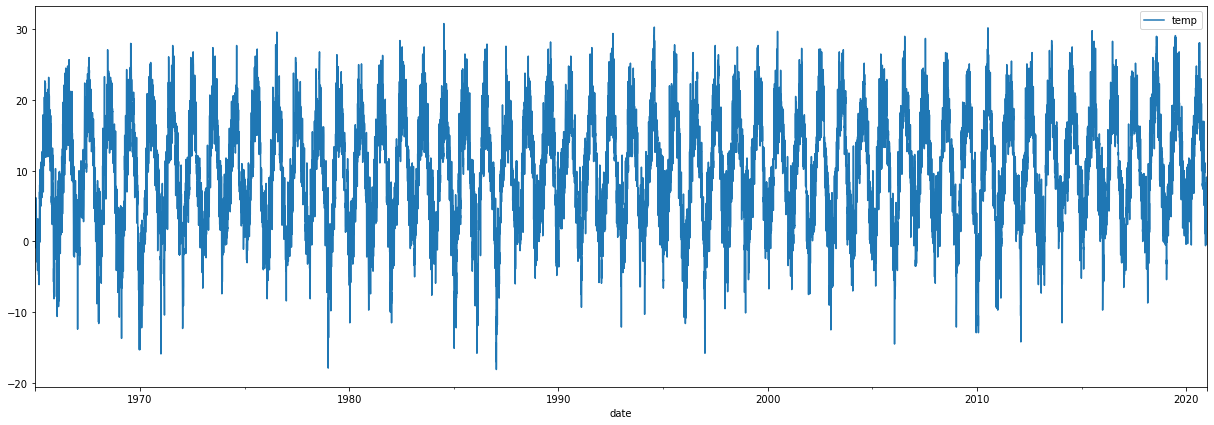

In [7]:
df_train.plot(figsize=(21,7))

In [8]:
def adfuller_test(series):
    adf_train_result = adfuller(series)

    print(f'ADF Statistic: {adf_train_result[0]}')
    print(f'p-value: {adf_train_result[1]}')
    print(f'lags: {adf_train_result[2]}')

adfuller_test(df_train['temp'])

ADF Statistic: -10.657917252194995
p-value: 4.48436317559286e-19
lags: 46


<AxesSubplot:xlabel='date'>

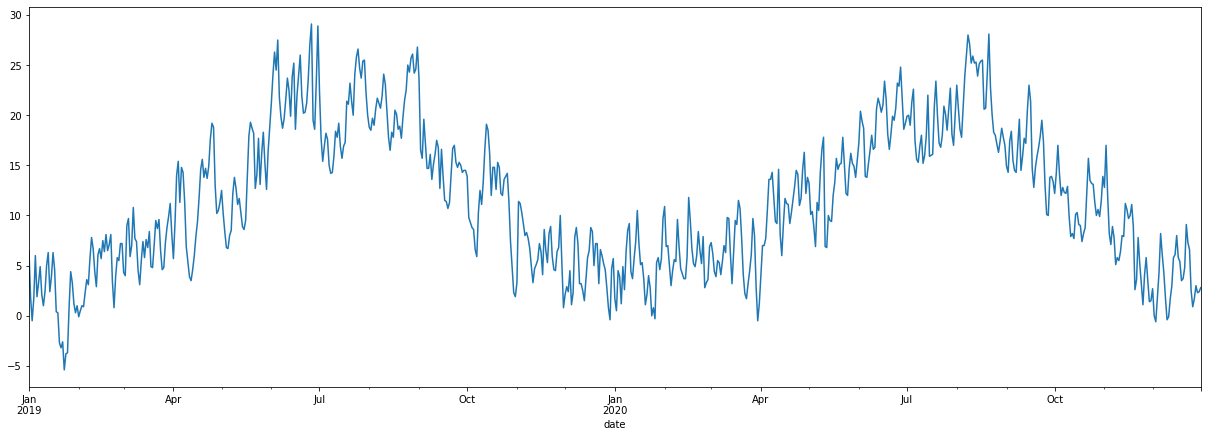

In [9]:
# According to p-value reject the null hypothesis (i.e series is stationary)

# Inspect the period of seaonality in the data
df_train['2019':'2020']['temp'].plot(figsize=(21,7))

In [10]:
df_train['seasonal_diff'] = df_train['temp'].diff(365)
df_train

,temp,seasonal_diff
date,,
1965-01-01,4.9,NaN
1965-01-02,2.8,NaN
1965-01-03,1.4,NaN
1965-01-04,-0.9,NaN
1965-01-05,2.4,NaN
...,...,...
2020-12-27,1.7,0.9
2020-12-28,3.0,3.4
2020-12-29,2.3,-2.4


<AxesSubplot:xlabel='date'>

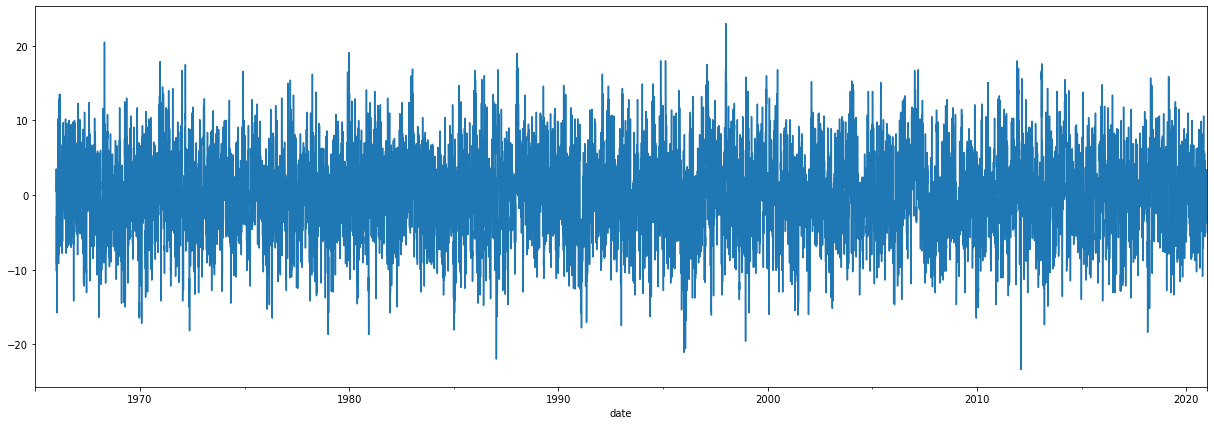

In [13]:
df_train['seasonal_diff'].plot(figsize=(21,7))

In [14]:
adfuller_test(df_train['seasonal_diff'].dropna())

ADF Statistic: -31.986876414942266
p-value: 0.0
lags: 10


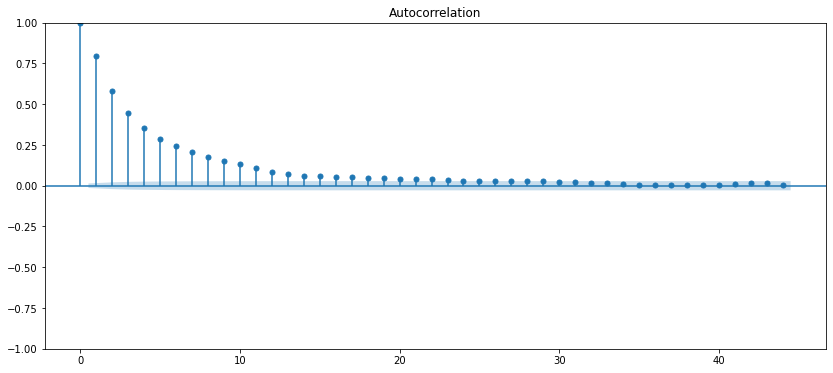

In [15]:
plot_acf(df_train['seasonal_diff'].dropna());

/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


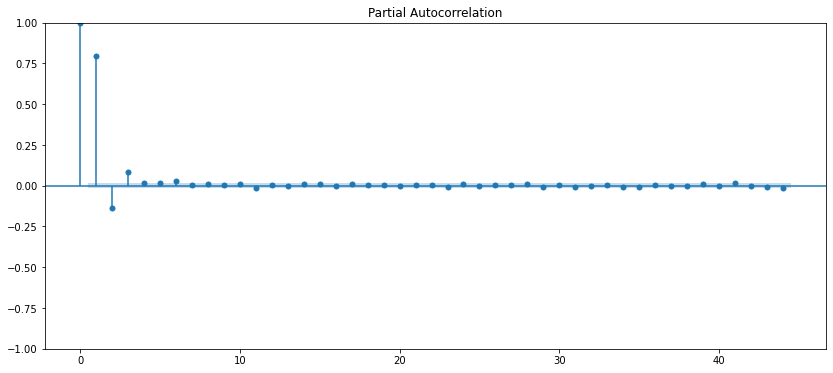

In [16]:
plot_pacf(df_train['seasonal_diff'].dropna());

In [17]:
auto_arima_model = auto_arima(
    df_train['temp'],
    start_p=0,
    start_q=0,
    max_p=366,
    max_q=366,
    max_d=5,
    trace = True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=94754.691, Time=0.27 sec


/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=94745.558, Time=0.56 sec


/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=94738.839, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=94752.691, Time=0.23 sec


/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=93606.696, Time=3.56 sec


/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=93054.426, Time=3.59 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=93977.166, Time=0.75 sec


/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=93007.406, Time=5.54 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=93771.540, Time=0.92 sec


/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=93007.609, Time=7.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=93007.980, Time=9.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=93007.499, Time=5.10 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=93602.698, Time=1.16 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=93011.379, Time=5.10 sec


/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=93005.406, Time=2.68 sec


/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=93052.426, Time=1.67 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=93769.539, Time=0.54 sec


/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,1,1)(0,0,0)[0]             : AIC=93005.609, Time=3.88 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=93005.980, Time=4.23 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=93975.166, Time=0.43 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=93005.499, Time=2.19 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=93600.698, Time=0.68 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=93009.380, Time=2.22 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0]          
Total fit time: 62.966 seconds


In [18]:
model = ARIMA(df_train['temp'], order=(3,1,1)).fit()

/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


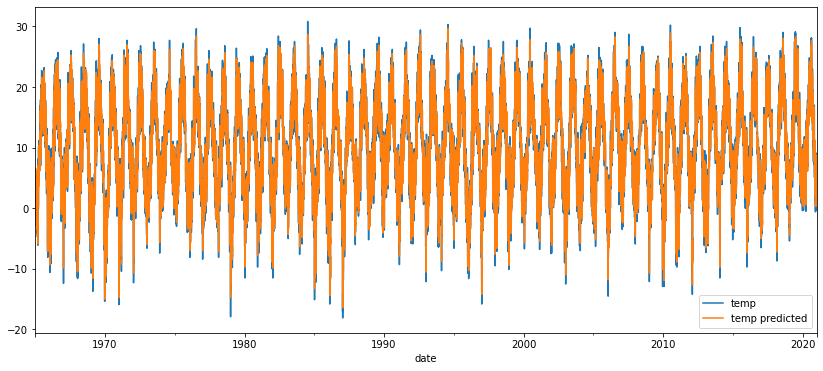

In [19]:
df_train['temp'].plot()
model.predict().plot(label='temp predicted')
plt.legend();

In [20]:
rmse_no_seasonality = mean_squared_error(df_train['temp'], model.predict(), squared=False)
rmse_no_seasonality

2.3502845537770543

In [21]:
df_test

,temp
date,
2021-01-01,2.2
2021-01-02,1.8
2021-01-03,0.5
2021-01-04,0.8
2021-01-05,1.8
...,...
2021-12-27,-3.9
2021-12-28,-0.5
2021-12-29,4.5


In [22]:
df_test['arima_pred'] = model.predict(start='2021-01-01', end='2021-12-31').values
df_test

,temp,arima_pred
date,,
2021-01-01,2.2,3.044961
2021-01-02,1.8,3.174258
2021-01-03,0.5,3.254357
2021-01-04,0.8,3.308602
2021-01-05,1.8,3.344918
...,...,...
2021-12-27,-3.9,3.413985
2021-12-28,-0.5,3.413985
2021-12-29,4.5,3.413985


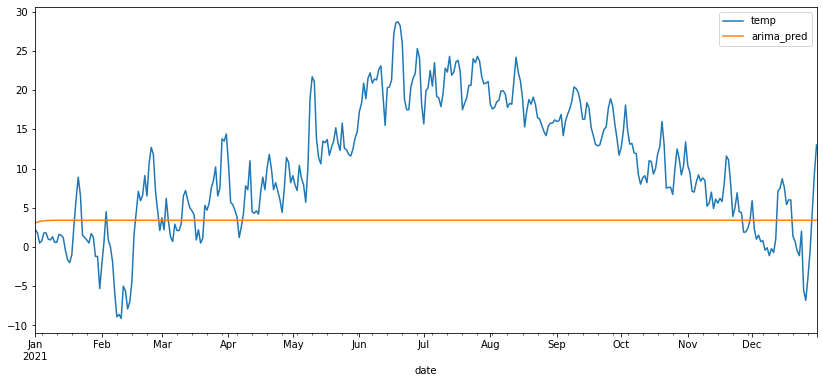

In [23]:
df_test[['temp', 'arima_pred']].plot()
plt.legend()

In [114]:
rmse_test_no_seasonality = mean_squared_error(df_test['temp'], df_test['arima_pred'], squared=False)

print(f'Train RMSE no seasonality: {rmse_no_seasonality}\nTest RMSE no seasonality: {rmse_test_no_seasonality}')

Train RMSE no seasonality: 2.770355515280462
Test RMSE no seasonality: 10.627127834551368


In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [106]:
auto_arima_model_seasonal = auto_arima(
    df_train['temp'],
    start_p=0,
    start_q=0,
    max_p=12,
    max_q=12,
    max_d=2,
    seasonal=True,
    start_P=0,
    start_Q=0,
    max_D=2,
    m=365,
    max_P=12,
    max_Q=12,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[365] intercept   : AIC=94754.691, Time=0.27 sec


KeyboardInterrupt: 

### Convert to monthly

In [37]:
# Sarima doesn't handly long seasonalities well, so convert data to monthly

df_train_monthly = pd.DataFrame(df_train.groupby(pd.PeriodIndex(df_train.index, freq="M"))['temp'].mean())

In [38]:
adfuller_test(df_train_monthly['temp'])

ADF Statistic: -4.459441909529493
p-value: 0.00023262337422804875
lags: 16


<AxesSubplot:xlabel='date'>

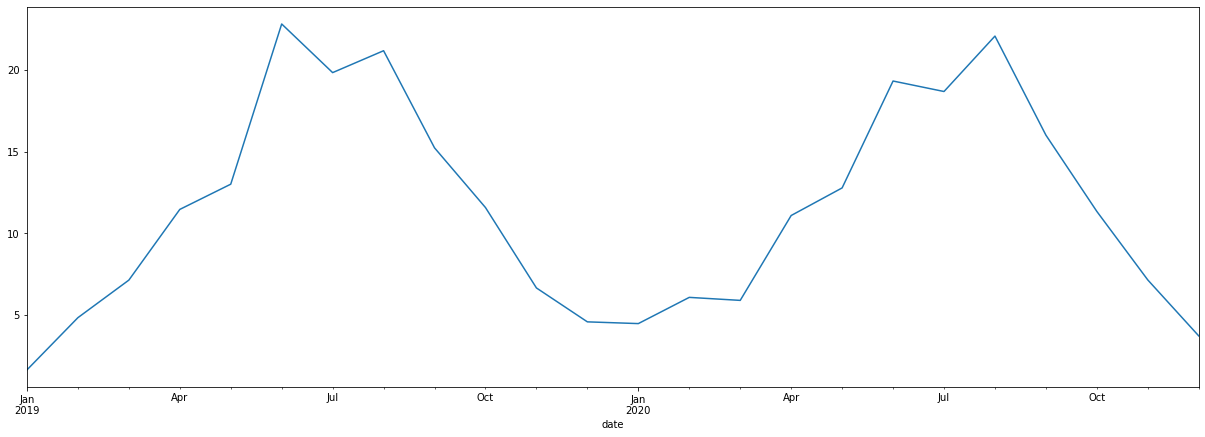

In [39]:
df_train_monthly['2019':'2020']['temp'].plot(figsize=(21,7))

In [46]:
df_train_monthly['seasonal_diff'] = df_train_monthly['temp'].diff(12)
df_train_monthly

,temp,seasonal_diff
date,,
1965-01,1.819355,NaN
1965-02,-1.182143,NaN
1965-03,2.332258,NaN
1965-04,7.913333,NaN
1965-05,12.241935,NaN
...,...,...
2020-08,22.074194,0.896774
2020-09,16.003333,0.780000
2020-10,11.325806,-0.238710


<AxesSubplot:xlabel='date'>

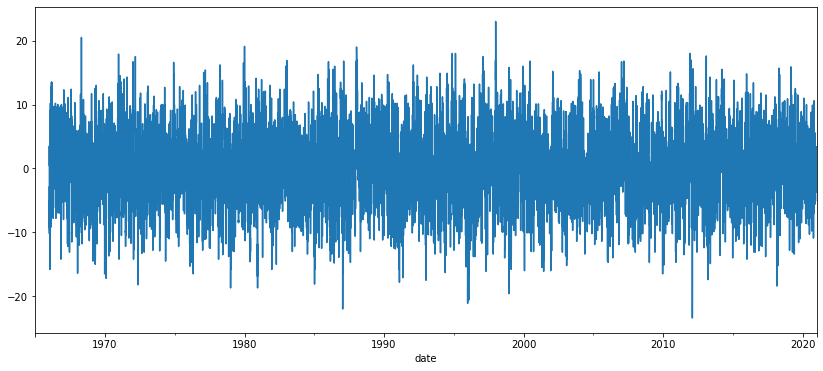

In [47]:
df_train['seasonal_diff'].plot()

In [62]:
adfuller_test(df_train_monthly['seasonal_diff'].dropna())

ADF Statistic: -9.710816733700995
p-value: 1.0127431190853194e-16
lags: 12


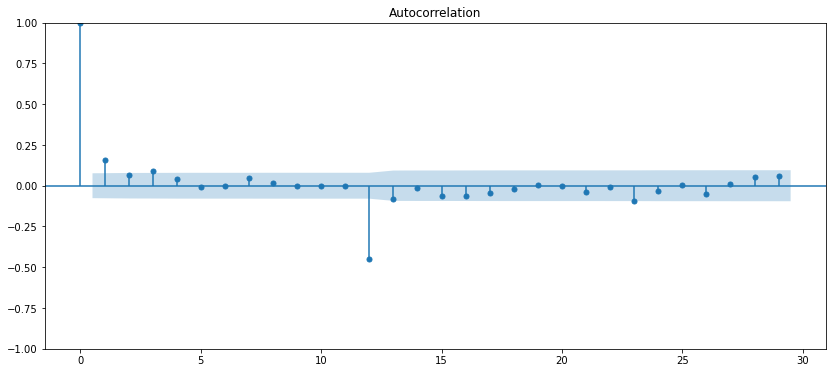

In [49]:
plot_acf(df_train_monthly['seasonal_diff'].dropna());

/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


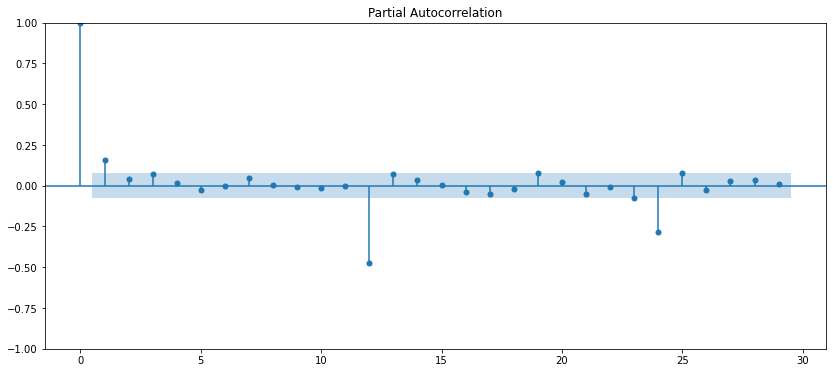

In [50]:
plot_pacf(df_train_monthly['seasonal_diff'].dropna());

In [52]:
auto_arima_monthly_model = auto_arima(
    df_train['temp'],
    start_p=0,
    start_q=0,
    max_p=12,
    max_q=12,
    max_d=5,
    trace = True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=94754.691, Time=0.28 sec


/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=94745.558, Time=0.57 sec


/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=94738.839, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=94752.691, Time=0.24 sec


/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=93606.696, Time=3.56 sec


/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=93054.426, Time=3.50 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=93977.166, Time=0.74 sec


/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=93007.406, Time=5.54 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=93771.540, Time=0.93 sec


/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=93007.609, Time=7.50 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=93007.980, Time=9.40 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=93007.499, Time=4.97 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=93602.698, Time=1.14 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=93011.379, Time=5.12 sec


/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=93005.406, Time=2.67 sec


/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=93052.426, Time=1.65 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=93769.539, Time=0.52 sec


/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,1,1)(0,0,0)[0]             : AIC=93005.609, Time=3.86 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=93005.980, Time=4.29 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=93975.166, Time=0.41 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=93005.499, Time=2.16 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=93600.698, Time=0.64 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=93009.380, Time=2.19 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0]          
Total fit time: 62.924 seconds


In [59]:
monthly_model = ARIMA(df_train_monthly['temp'], order=(3,1,1)).fit()

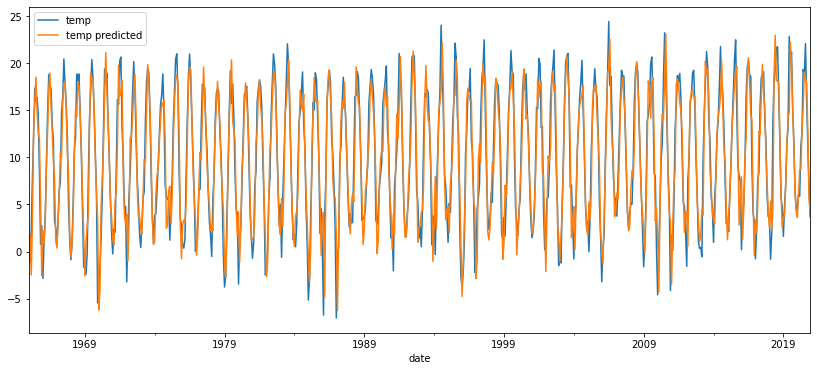

In [69]:
df_train_monthly['temp'].plot()
monthly_model.predict().plot(label='temp predicted')
plt.legend();

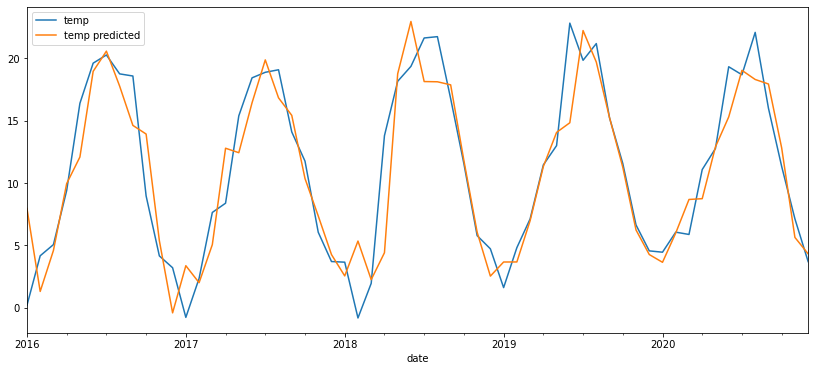

In [70]:
df_train_monthly['temp']['2016':'2020'].plot()
monthly_model.predict()['2016':'2020'].plot(label='temp predicted')
plt.legend();

In [85]:
rmse_train_no_seasonality_monthly = mean_squared_error(df_train_monthly['temp'], monthly_model.predict(), squared=False)
rmse_train_no_seasonality_monthly

2.770355515280462

In [58]:
monthly_model.predict()

1965-01-01    0.000000
1965-01-02    4.900001
1965-01-03    2.751042
1965-01-04    1.764863
1965-01-05   -0.424998
                ...   
2020-12-27    1.713467
2020-12-28    2.509732
2020-12-29    3.415829
2020-12-30    2.460059
2020-12-31    2.758849
Freq: D, Name: predicted_mean, Length: 20454, dtype: float64

In [64]:
df_test_monthly = pd.DataFrame(df_test.groupby(pd.PeriodIndex(df_test.index, freq="M"))['temp'].mean())
df_test_monthly

,temp
date,
2021-01,1.170968
2021-02,1.060714
2021-03,5.261290
2021-04,6.930000
2021-05,12.548387
2021-06,21.633333
2021-07,21.206452
2021-08,18.054839
2021-09,16.276667


In [66]:
df_test_monthly['arima_pred'] = monthly_model.predict(start='2021-01', end='2021-12').values
df_test_monthly

,temp,arima_pred
date,,
2021-01,1.170968,3.030676
2021-02,1.060714,4.260976
2021-03,5.261290,7.255788
2021-04,6.930000,10.682407
2021-05,12.548387,13.707561
2021-06,21.633333,15.427836
2021-07,21.206452,15.594191
2021-08,18.054839,14.309400
2021-09,16.276667,12.138310


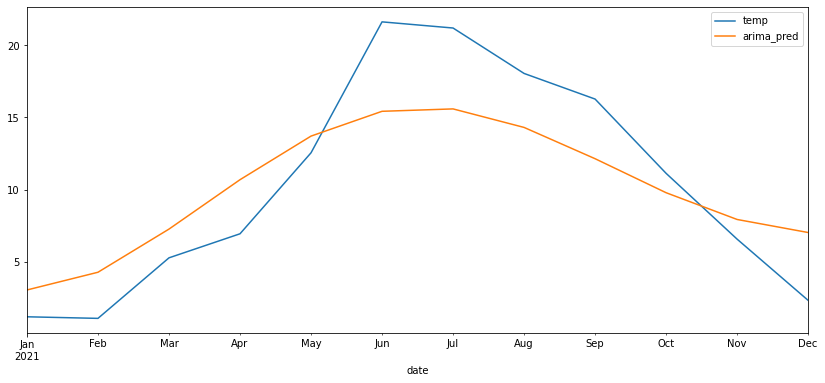

In [67]:
df_test_monthly[['temp', 'arima_pred']].plot()
plt.legend()

In [72]:
rmse_test_no_seasonality_monthly = mean_squared_error(df_test_monthly['temp'], df_test_monthly['arima_pred'], squared=False)
rmse_test_no_seasonality_monthly

3.652629689903399

In [74]:
auto_arima_monthly_model_seasonal = auto_arima(
    df_train_monthly['temp'],
    start_p=0,
    start_q=0,
    max_p=25,
    max_q=25,
    max_d=2,
    seasonal=True,
    start_P=0,
    start_Q=0,
    max_D=2,
    m=12,
    max_P=25,
    max_Q=25,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4531.173, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3718.257, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5265.687, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=4001.977, Time=0.08 sec


/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=3536.737, Time=5.86 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=10.14 sec
 ARIMA(0,0,1)(0,0,3)[12] intercept   : AIC=3444.917, Time=75.99 sec
 ARIMA(0,0,1)(1,0,3)[12] intercept   : AIC=inf, Time=183.04 sec
 ARIMA(0,0,1)(0,0,4)[12] intercept   : AIC=3385.703, Time=104.02 sec
 ARIMA(0,0,1)(1,0,4)[12] intercept   : AIC=inf, Time=261.13 sec
 ARIMA(0,0,1)(0,0,5)[12] intercept   : AIC=3317.213, Time=124.72 sec
 ARIMA(0,0,1)(1,0,5)[12] intercept   : AIC=2874.888, Time=341.37 sec
 ARIMA(0,0,1)(2,0,5)[12] intercept   : AIC=inf, Time=371.23 sec
 ARIMA(0,0,1)(1,0,6)[12] intercept   : AIC=inf, Time=573.94 sec
 ARIMA(0,0,1)(0,0,6)[12] intercept   : AIC=3285.869, Time=190.55 sec
 ARIMA(0,0,1)(2,0,4)[12] intercept   : AIC=inf, Time=411.61 sec
 ARIMA(0,0,1)(2,0,6)[12] intercept   : AIC=inf, Time=590.15 sec
 ARIMA(0,0,0)(1,0,5)[12] intercept   : AIC=inf, Time=303.42 sec
 ARIMA(1,0,1)(1,

In [77]:
sarima_monthly_model = SARIMAX(
    df_train_monthly['temp'],
    order=(0,0,1),
    seasonal_order=(1,0,5,12)
).fit()

/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39695D+00    |proj g|=  8.59174D-02

At iterate    5    f=  2.81688D+00    |proj g|=  1.25949D+00

At iterate   10    f=  2.18295D+00    |proj g|=  1.62318D-01

At iterate   15    f=  2.14453D+00    |proj g|=  3.83635D-02

At iterate   20    f=  2.13688D+00    |proj g|=  1.26419D-03

At iterate   25    f=  2.13688D+00    |proj g|=  2.20961D-04

At iterate   30    f=  2.13685D+00    |proj g|=  1.15142D-03

At iterate   35    f=  2.13616D+00    |proj g|=  5.43573D-03

At iterate   40    f=  2.13579D+00    |proj g|=  2.90692D-03

At iterate   45    f=  2.13576D+00    |proj g|=  1.62730D-03

At iterate   50    f=  2.13575D+00    |proj g|=  1.71058D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [108]:
sarima_monthly_model = SARIMAX(
    df_train_monthly['temp'],
    order=(0,0,1),
    seasonal_order=(1,0,5,12)
).fit(maxiter=200)

/Users/alantrinh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39695D+00    |proj g|=  8.59174D-02

At iterate    5    f=  2.81688D+00    |proj g|=  1.25949D+00

At iterate   10    f=  2.18295D+00    |proj g|=  1.62318D-01

At iterate   15    f=  2.14453D+00    |proj g|=  3.83635D-02

At iterate   20    f=  2.13688D+00    |proj g|=  1.26419D-03

At iterate   25    f=  2.13688D+00    |proj g|=  2.20961D-04

At iterate   30    f=  2.13685D+00    |proj g|=  1.15142D-03

At iterate   35    f=  2.13616D+00    |proj g|=  5.43573D-03

At iterate   40    f=  2.13579D+00    |proj g|=  2.90692D-03

At iterate   45    f=  2.13576D+00    |proj g|=  1.62730D-03

At iterate   50    f=  2.13575D+00    |proj g|=  1.71058D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

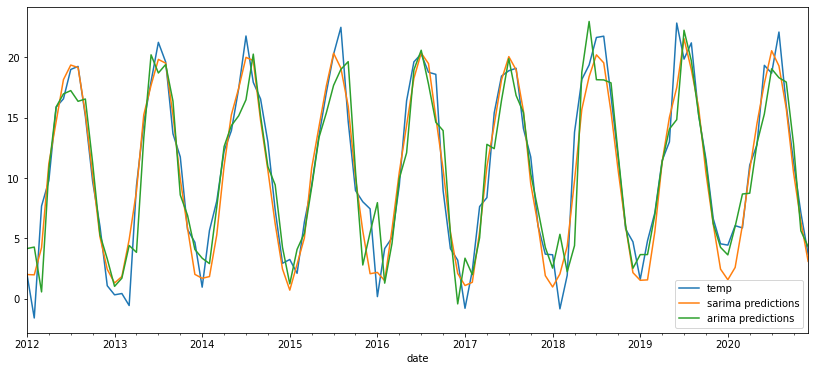

In [109]:
df_train_monthly['temp']['2012':].plot(label='temp')
sarima_monthly_model.predict()['2012':].plot(label='sarima predictions')
monthly_model.predict()['2012':].plot(label='arima predictions')
plt.legend()

In [110]:
rmse_train_sarima_monthly = mean_squared_error(df_train_monthly['1966':]['temp'], sarima_monthly_model.predict()['1966':], squared=False)
print(f'Train RMSE no seasonality: {rmse_train_no_seasonality_monthly}\nTrain RMSE SARIMA: {rmse_train_sarima_monthly}')

Train RMSE no seasonality: 2.770355515280462
Train RMSE SARIMA: 1.9975202412028628


<AxesSubplot:xlabel='date'>

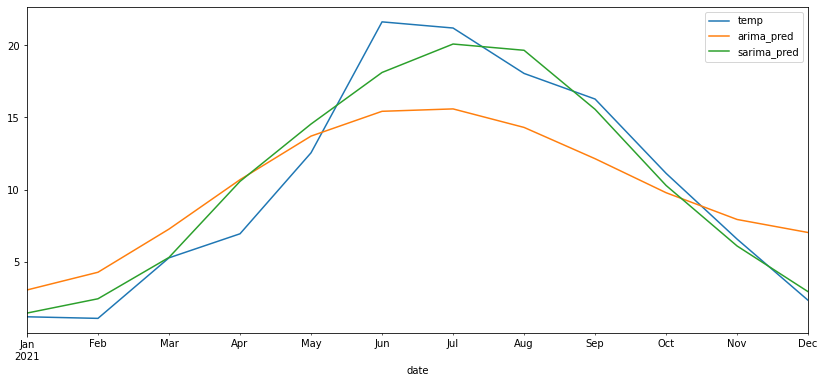

In [111]:
df_test_monthly['sarima_pred'] = sarima_monthly_model.predict(start='2021-01-01', end='2021-12-01')

df_test_monthly[['temp', 'arima_pred', 'sarima_pred']].plot()

In [112]:
rmse_test_sarima_monthly = mean_squared_error(df_test_monthly['temp'], df_test_monthly['sarima_pred'], squared=False)
print(f'Test RMSE no seasonality: {rmse_test_no_seasonality_monthly}\nTest RMSE SARIMA: {rmse_test_sarima_monthly}')

Test RMSE no seasonality: 3.652629689903399
Test RMSE SARIMA: 1.757501778218545


In [113]:
df_test_monthly

,temp,arima_pred,sarima_pred
date,,,
2021-01,1.170968,3.030676,1.428156
2021-02,1.060714,4.260976,2.420972
2021-03,5.261290,7.255788,5.288477
2021-04,6.930000,10.682407,10.565171
2021-05,12.548387,13.707561,14.545559
2021-06,21.633333,15.427836,18.121885
2021-07,21.206452,15.594191,20.095581
2021-08,18.054839,14.309400,19.661451
2021-09,16.276667,12.138310,15.564441
